In [7]:
import pandas as pd
import random 
import numpy as np
from scipy.spatial import distance_matrix
import time
import warnings
from tqdm import tqdm 
import itertools
warnings.filterwarnings('ignore')

In [8]:
tsp_c = pd.read_csv("TSPC.csv", sep=';', header=None)
tsp_d = pd.read_csv("TSPD.csv", sep=';', header=None)

In [9]:
def get_random_solution():
    return random.sample([i for i in range(0, 200)], 100)

def calulate_total_cost(path):
    total = 0
    nr = len(path)
    for idx, node in enumerate(path):
        total += dm[node][path[(idx+1)%nr]]
    return total

def generate_dm(df, show=True):
    temp = df[[0, 1]].to_numpy()
    dm = distance_matrix(temp, temp)


    temp = df[2].to_numpy() // 2
    temp = temp * np.ones((200, 200))
    dm = dm+temp+temp.T
    dm = dm // 1

    for i in range(200):
        dm[i][i] = np.inf
    
    if show: 
        df_dist = pd.DataFrame(dm)
        display(df_dist)
    return dm

In [10]:
def gen_node_exchange_moves(path):
    not_selected = list(set([i for i in range(200)]) - set(path))
    node_moves = []
    for idx, node in enumerate(path):
        for new_node in not_selected:
            new_cost = dm[path[idx-1]][new_node] + dm[path[(idx+1)%100]][new_node] # two new edges
            new_cost -= (dm[path[idx-1]][node] + dm[path[(idx+1)%100]][node]) #
            node_moves.append((new_cost, 'n', idx, new_node)) #cost, type, idx of old move, new_node
    return node_moves

In [11]:
def gen_edge_exchange_moves(path):
    edge_moves = []
    for idx1, idx2 in all_posibble_comb:
        if (idx2+1)%100 != idx1:
            new_cost = dm[path[idx1]][path[(idx2+1)%100]] + dm[path[idx1-1]][path[idx2]] #new edges
            new_cost -= (dm[path[idx1-1]][path[idx1]] + dm[path[idx2]][path[(idx2+1)%100]]) #old edges
            edge_moves.append((new_cost, 'e', idx1, idx2))
    return edge_moves

In [6]:
dm = generate_dm(tsp_c, False)
all_posibble_comb = list(itertools.combinations([i for i in range(100)], 2))

path = get_random_solution()
print(calulate_total_cost(path))
s = time.time()
run = True
while run:
    run = False
    moves = gen_edge_exchange_moves(path) + gen_node_exchange_moves(path)
    moves.sort(key=lambda x:x[0])
    best_move = moves[0]
    if best_move[0] < 0:
        if best_move[1] == 'n':
            idx = best_move[2]
            new_node = best_move[3]
            path[idx] = new_node
            run = True
        else:
            idx1 = best_move[2]
            idx2 = best_move[3]
            path = path[:idx1] + path[idx1:idx2+1][::-1] + path[idx2+1:]
            run = True
        
            
    
    
print(calulate_total_cost(path))
print(time.time() - s)

209063.0
52879.0
3.067905902862549


In [15]:
def local_search(dm,all_combinations,path):
    run = True
    while run:
        run = False
        moves = gen_edge_exchange_moves(path) + gen_node_exchange_moves(path)
        moves.sort(key=lambda x:x[0])
        best_move = moves[0]
        if best_move[0] < 0:
            if best_move[1] == 'n':
                idx = best_move[2]
                new_node = best_move[3]
                path[idx] = new_node
                run = True
            else:
                idx1 = best_move[2]
                idx2 = best_move[3]
                path = path[:idx1] + path[idx1:idx2+1][::-1] + path[idx2+1:]
                run = True
    return path
        
    

In [16]:
dm = generate_dm(tsp_c, False)
all_posibble_comb = list(itertools.combinations([i for i in range(100)], 2))

path = get_random_solution()
print(calulate_total_cost(path))
s = time.time()
result = local_search(dm,all_posibble_comb,path)
time.time() - s

213978.0


3.3075098991394043

In [18]:
calulate_total_cost(result)

50548.0

In [28]:
def msls(tsp):
    results = []
#     times = []
    dm = generate_dm(tsp, False)
    all_posibble_comb = list(itertools.combinations([i for i in range(100)], 2))
    for i in tqdm(range(100)):
        path = get_random_solution()
#         start = time.time()
        result = local_search(dm,all_posibble_comb,path)
#         times.append(time.time()-start)
        results.append((result,calulate_total_cost(result)))
    return min(results, key=lambda x: x[1])


In [32]:
time_scores = []
scores = []
for i in range(20):
    start = time.time()
    result = msls(tsp_c)
    time_scores.append(time.time()-start)
    scores.append(result)
    

100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [04:57<00:00,  2.98s/it]


In [33]:
print(min(scores,key=lambda x:x[1]))

([64, 71, 61, 163, 74, 195, 55, 22, 53, 117, 108, 62, 32, 180, 81, 154, 144, 141, 87, 79, 194, 21, 186, 127, 88, 153, 167, 101, 135, 51, 112, 169, 95, 31, 73, 72, 190, 66, 6, 172, 156, 98, 94, 89, 42, 111, 14, 107, 80, 124, 8, 125, 26, 92, 48, 106, 198, 160, 162, 11, 152, 130, 119, 109, 189, 75, 1, 177, 41, 137, 174, 199, 192, 77, 4, 114, 91, 121, 50, 149, 0, 69, 19, 178, 164, 159, 143, 59, 147, 27, 96, 158, 37, 118, 128, 132, 36, 113, 181, 185], 48874.0)


In [34]:
print(max(scores,key=lambda x:x[1]))

([195, 55, 36, 132, 128, 164, 178, 143, 59, 147, 96, 185, 64, 71, 61, 113, 74, 163, 62, 32, 81, 154, 144, 141, 87, 79, 194, 21, 170, 186, 127, 88, 153, 167, 101, 99, 135, 51, 196, 169, 95, 112, 5, 72, 190, 66, 6, 156, 98, 94, 12, 73, 31, 111, 14, 80, 124, 123, 8, 26, 92, 48, 106, 160, 11, 152, 130, 119, 109, 189, 75, 1, 177, 41, 137, 174, 199, 192, 77, 4, 114, 91, 121, 50, 149, 19, 0, 49, 145, 76, 161, 129, 157, 171, 108, 15, 117, 53, 18, 22], 49565.0)


In [35]:
print(np.mean([i[1] for i in scores]))

49231.0


In [48]:
print(min(time_scores))

295.34081196784973


In [49]:
print(max(time_scores))

300.87582778930664


In [50]:
print(np.mean(time_scores))

297.8682311534882


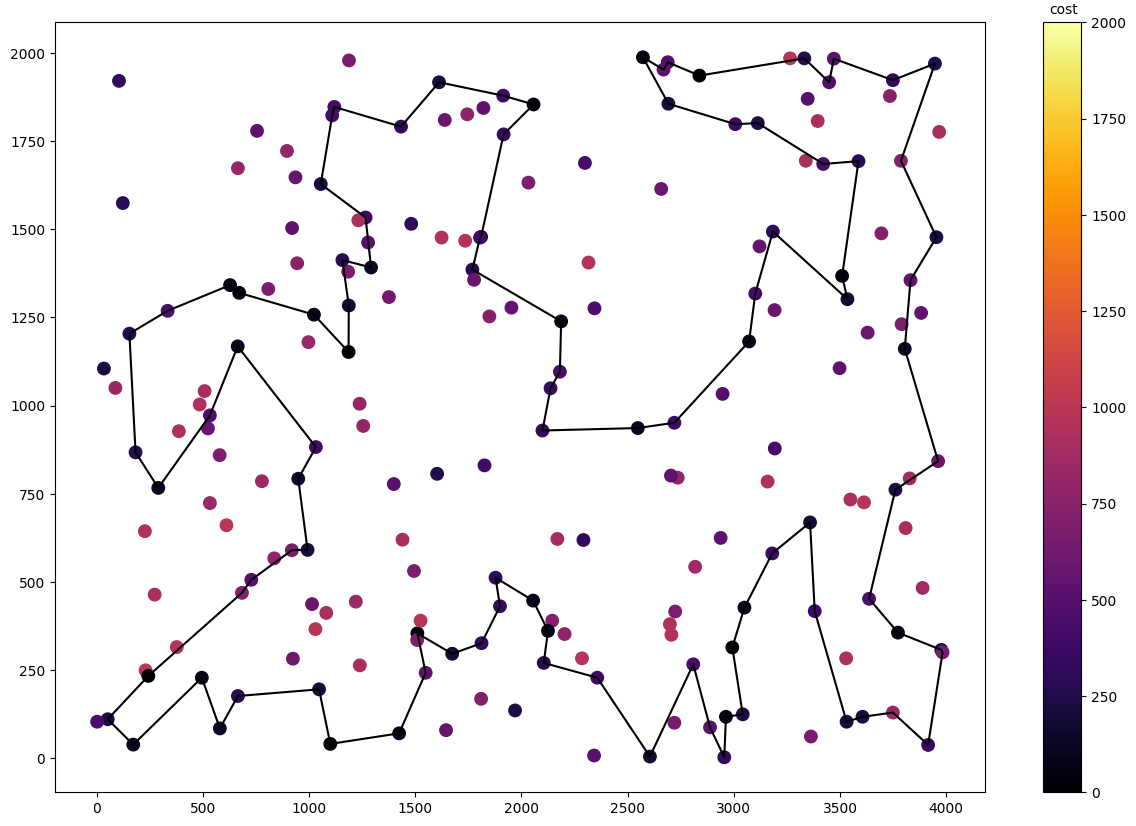

In [37]:
# best_sol = totals.argmin()
# print(best_sol)
# sore, cycle  = f(best_sol, dm,tsp_b, 1, 0, True)
# cycle = [x.split('_') for x in cycle]
# order = ['0']
# while len(order) < 100:
#     for n1, n2 in cycle:
#         if n1 == order[-1]:
#             order.append(n2)
import matplotlib.pyplot as plt

order = min(scores,key=lambda x:x[1])[0]
# order = [int(x) for x in order]
cycle = tsp_c.loc[order]
cycle = cycle.append(cycle.iloc[0])

plt.figure(figsize=(15, 10))
plt.scatter(tsp_c[0], tsp_c[1], 80, tsp_c[2], cmap='inferno')
plt.clim(0, 2000)
plt.colorbar().set_label('cost', labelpad=-45, y=1.025, rotation=0)
plt.plot(cycle[0], cycle[1], c='black')
plt.show()

In [38]:
np.mean(time_scores)

297.8682311534882

In [39]:
random.shuffle(order)

In [40]:
order

[31,
 6,
 167,
 181,
 128,
 154,
 81,
 106,
 61,
 101,
 180,
 14,
 152,
 149,
 62,
 119,
 114,
 162,
 64,
 185,
 26,
 190,
 50,
 32,
 37,
 117,
 8,
 132,
 1,
 55,
 174,
 107,
 27,
 91,
 41,
 130,
 79,
 71,
 77,
 135,
 153,
 94,
 48,
 198,
 42,
 121,
 143,
 156,
 109,
 22,
 189,
 66,
 137,
 19,
 125,
 95,
 111,
 108,
 160,
 0,
 192,
 141,
 69,
 172,
 158,
 11,
 164,
 53,
 72,
 147,
 75,
 195,
 159,
 169,
 88,
 112,
 186,
 127,
 163,
 124,
 199,
 21,
 194,
 74,
 4,
 113,
 98,
 96,
 51,
 144,
 36,
 59,
 178,
 87,
 89,
 73,
 92,
 80,
 177,
 118]

In [77]:
def ils(tsp):
    dm = generate_dm(tsp, False)
    all_posibble_comb = list(itertools.combinations([i for i in range(100)], 2))
    path = get_random_solution()
    result = local_search(dm,all_posibble_comb,path)
    msls_time = 297.8682311534882
    start = time.time()
    counts = 0
    while time.time() - start < msls_time:
        first_part,second_part = result[:len(result)//2],result[len(result)//2:]
        random.shuffle(first_part)
        result=first_part+second_part
        new_result = local_search(dm,all_posibble_comb,result)
        if calulate_total_cost(new_result) < calulate_total_cost(result):
            result = new_result
        counts += 1
    print(counts)
    return result

In [79]:
ils_time_scores = []
ils_scores = []
for i in tqdm(range(1)):
    start = time.time()
    result = ils(tsp_c)
    ils_time_scores.append(time.time()-start)
    ils_scores.append((result,calulate_total_cost(result)))


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [05:01<00:00, 301.32s/it]

258


In [81]:
ils_scores[0][1]

50665.0

In [57]:
print(min(ils_scores,key=lambda x:x[1]))

([143, 59, 147, 27, 96, 185, 64, 20, 71, 113, 163, 74, 138, 195, 55, 22, 53, 62, 32, 180, 108, 15, 117, 171, 81, 154, 144, 141, 87, 79, 194, 21, 157, 161, 76, 0, 69, 149, 50, 121, 91, 114, 175, 153, 88, 127, 186, 66, 6, 172, 156, 98, 190, 72, 12, 94, 42, 89, 31, 73, 112, 51, 135, 196, 95, 169, 8, 26, 92, 48, 106, 160, 11, 152, 130, 119, 134, 109, 189, 126, 83, 174, 75, 1, 177, 41, 137, 39, 199, 192, 2, 4, 77, 43, 86, 35, 19, 178, 164, 159], 49597.0)


In [58]:
print(max(ils_scores,key=lambda x:x[1]))

([19, 69, 0, 149, 50, 86, 43, 77, 4, 2, 114, 121, 91, 175, 153, 161, 76, 129, 170, 88, 127, 186, 45, 167, 192, 199, 137, 41, 177, 1, 75, 189, 130, 152, 11, 48, 26, 8, 169, 95, 31, 94, 12, 112, 51, 135, 72, 190, 98, 66, 156, 6, 141, 87, 144, 102, 44, 79, 194, 157, 21, 133, 154, 81, 180, 32, 62, 108, 171, 15, 117, 53, 18, 22, 55, 195, 155, 138, 74, 163, 113, 71, 20, 64, 185, 181, 132, 36, 136, 145, 128, 37, 96, 147, 59, 143, 159, 34, 164, 178], 52077.0)


In [59]:
print(np.mean([i[1] for i in ils_scores]))

50622.15


In [60]:
print(min(ils_time_scores))

300.92325830459595


In [61]:
print(max(ils_time_scores))

303.542946100235


In [62]:
print(np.mean(ils_time_scores))

302.2546766161919


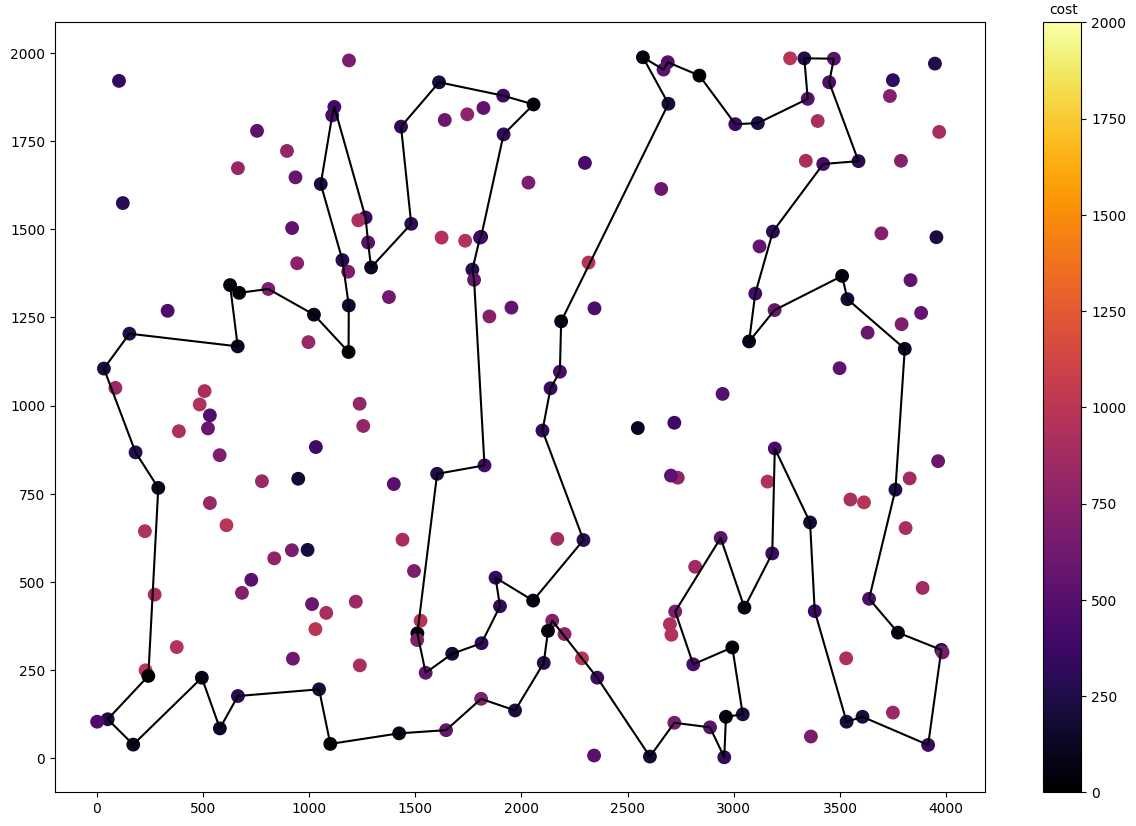

In [63]:
order = min(ils_scores,key=lambda x:x[1])[0]
# order = [int(x) for x in order]
cycle = tsp_c.loc[order]
cycle = cycle.append(cycle.iloc[0])

plt.figure(figsize=(15, 10))
plt.scatter(tsp_c[0], tsp_c[1], 80, tsp_c[2], cmap='inferno')
plt.clim(0, 2000)
plt.colorbar().set_label('cost', labelpad=-45, y=1.025, rotation=0)
plt.plot(cycle[0], cycle[1], c='black')
plt.show()

In [70]:
test = [1,2,3,4,5,6,7,8,9]
first_part,second_part = test[:len(test)//2],test[len(test)//2:]
first_part,second_part

([1, 2, 3, 4], [5, 6, 7, 8, 9])

In [72]:
random.shuffle(first_part)
first_part+second_part

[2, 4, 3, 1, 5, 6, 7, 8, 9]